## Concrete Compressive Strength Prediction :

In [ ]:
Concrete Compressive Strength 

Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

### PROBLEM : The concrete compressive strength is the Linear regression problem.

### Description of Features.

In [ ]:
Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable 

The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 



### Changing the Directory :

In [3]:
import os
os.getcwd()

os.chdir(r'C:\Users\shahe\Desktop\DataMining\Project\LinearRegressionProject')
os.getcwd()

'C:\\Users\\shahe\\Desktop\\DataMining\\Project\\LinearRegressionProject'

### Importing some Basic Libraries :

In [4]:
import warnings
warnings.filterwarnings("ignore") # To supress the unnecessary warnings.

import numpy as np               # For Mathematical Calculations
import pandas as pd              # For Data Processing or I/O
import seaborn as sns            # For Visualization
import matplotlib.pyplot as plt  # For Visualization


### Reading the Data :

In [5]:
df= pd.read_excel('Concrete_Data.xls',na_values=' ')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### SHAPE OF THE DATA :

In [7]:
## UNDERSTANDING THE DATA

### Checking the Shape of the Data Frame.

print ( f" The Shape of the Data Set: {df.shape} \n")
print ( f" Number of Observations: {df.shape[0]}\n " )
print ( f" Number of Columns: {df.shape[1]}\n " )

 The Shape of the Data Set: (1030, 9) 

 Number of Observations: 1030
 
 Number of Columns: 9
 


In [21]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

### CHANGING THE NAMES OF THE COLUMNS :

In [8]:
df.columns=['Component1','Component2','Component3','Component4','Component5','Component6',
            'Component7','Ageindays','ConcreteStrength']
      

In [89]:
df.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Ageindays,ConcreteStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Saving a copy of original data before any manipulations :

In [10]:
df_original = df.copy()

### Descriptive Summary of Data :

In [11]:

df.describe(include='all')

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Ageindays,ConcreteStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### OUTLIER Analysis :

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


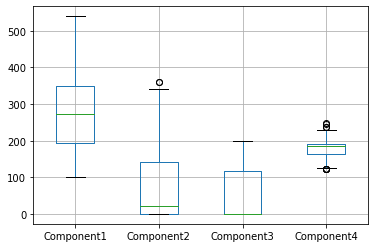

In [26]:

boxplot = df.boxplot(column=['Component1', 'Component2', 'Component3','Component4'])

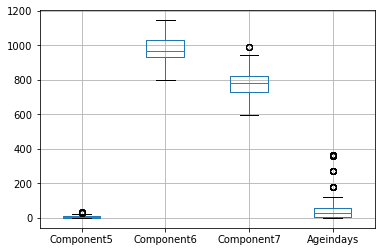

In [27]:

boxplot = df.boxplot(column=['Component5', 'Component6','Component7', 'Ageindays'])

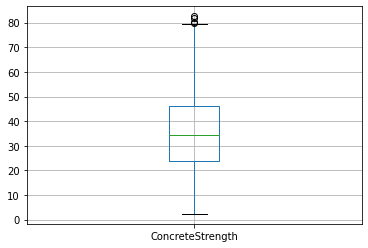

In [28]:
boxplot = df.boxplot(column=['ConcreteStrength'])

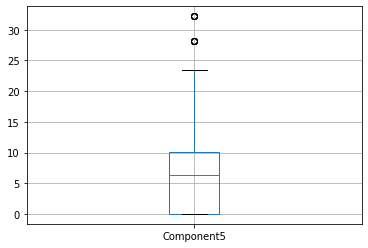

In [29]:
boxplot = df.boxplot(column=['Component5'])

### Checking Missing values :

In [30]:
#check the missing values
df.isna().mean()

Component1          0.0
Component2          0.0
Component3          0.0
Component4          0.0
Component5          0.0
Component6          0.0
Component7          0.0
Ageindays           0.0
ConcreteStrength    0.0
dtype: float64

### Handling Duplicates :

In [13]:
df.duplicated().sum()

25

In [14]:

df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

### Checking the Distribution of Target 'Concrete Strength'

<AxesSubplot:xlabel='ConcreteStrength', ylabel='Density'>

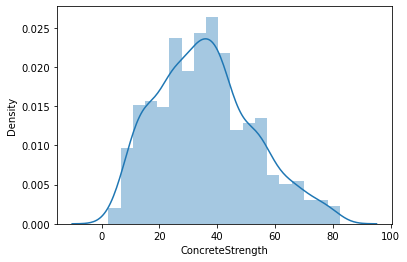

In [67]:
sns.distplot(df['ConcreteStrength'])

### The Distribution of Target variable looks normal.

### Checking for Co-relation :

In [98]:
df.corr()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Ageindays,ConcreteStrength
Component1,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Component2,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Component3,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Component4,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Component5,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Component6,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Component7,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Ageindays,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
ConcreteStrength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


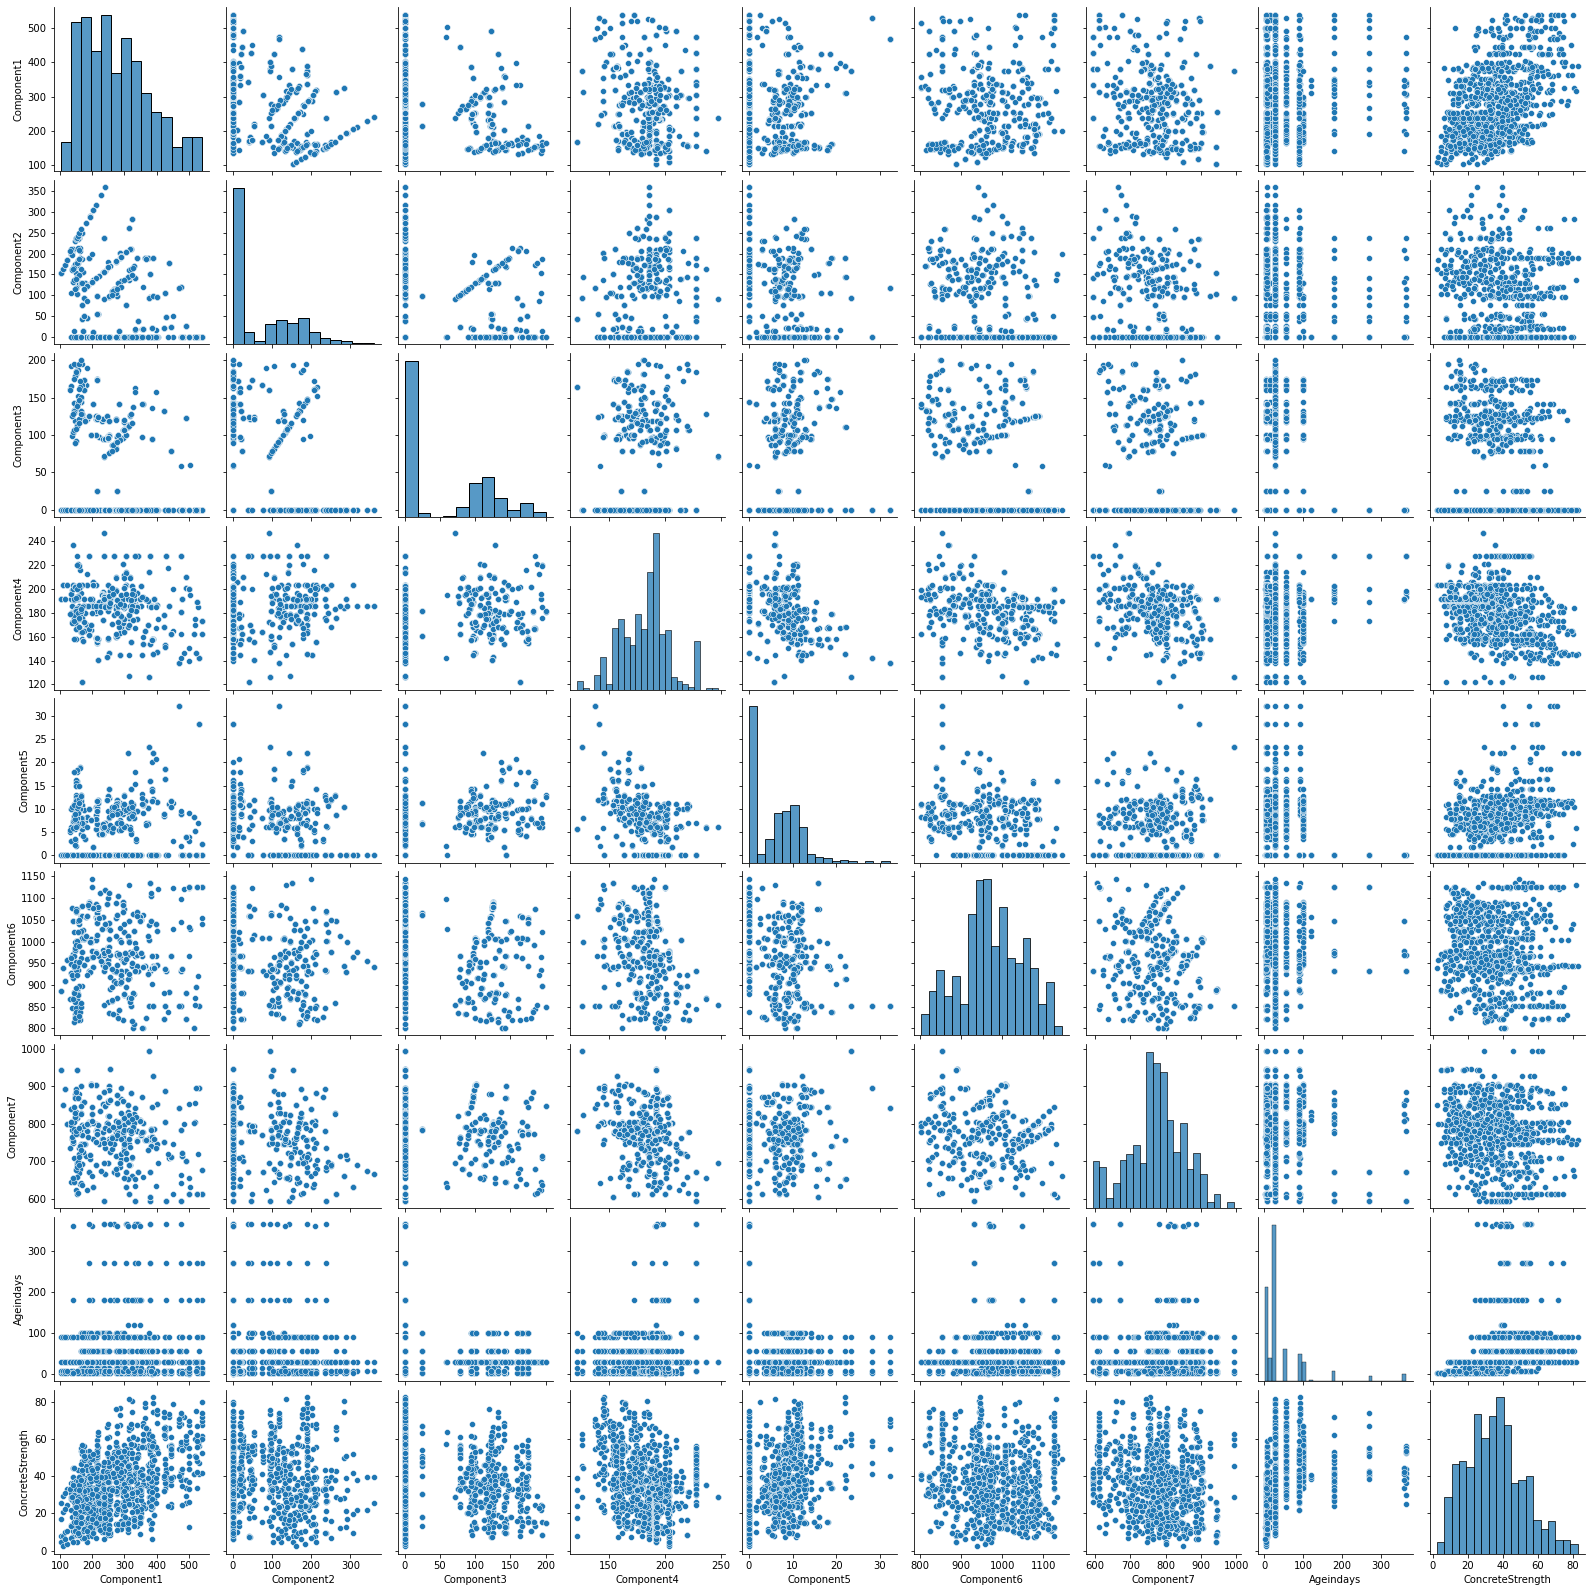

In [39]:

# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

### SCALING : Since the units for independent variables is kgs and Dependent variable is Megapascles.
Scaling Not required for Linear Regression though, Just added these steps for my future reference.

In [16]:
### Feature Scaling : Actually Scaling is not needed for Linear Regression Models.

### Normalising

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()


,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Ageindays,ConcreteStrength
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176,0.967445
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,0.741964
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,0.472642
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.482400
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,0.522806


In [17]:
### Standardising

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_standardised = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
df_standardised.head()



,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Ageindays,ConcreteStrength
0,2.506120,-0.836469,-0.865363,-0.941128,-0.596903,0.846308,-1.204069,-0.280312,2.748458
1,2.506120,-0.836469,-0.865363,-0.941128,-0.596903,1.039755,-1.204069,-0.280312,1.636516
2,0.516534,0.818051,-0.865363,2.153088,-1.019442,-0.546505,-2.225242,3.518569,0.308371
3,0.516534,0.818051,-0.865363,2.153088,-1.019442,-0.546505,-2.225242,5.009865,0.356492
4,-0.767348,0.700784,-0.865363,0.465334,-1.019442,0.051889,0.657702,4.931375,0.555751


### Encoding : Not Needed as all variables are Numeric

### Shuffling the Rows:

In [18]:
#Shuffle the rows of the dataframe, to mix the data evenly
df = df.sample(frac = 1, random_state=0)

### Separating the Data set into X(independent variables) and y(dependent variable)

In [19]:
#extract dependent and independent variables
X = df.drop('ConcreteStrength',axis=1)
y = df.ConcreteStrength

In [44]:
X.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Ageindays
734,349.0,0.0,0.00,192.00,0.0,1056.00,809.00,90
690,288.0,192.0,0.00,192.00,0.0,932.00,717.80,7
322,249.1,0.0,98.75,158.11,12.8,987.76,889.01,56
380,475.0,0.0,59.00,142.00,1.9,1098.00,641.00,28
595,186.2,124.1,0.00,185.70,0.0,1083.40,764.30,28


In [45]:
y.head()

734    40.658400
690    23.523542
322    42.030457
380    57.226508
595    17.596806
Name: ConcreteStrength, dtype: float64

### Checking correlation among independent variables :

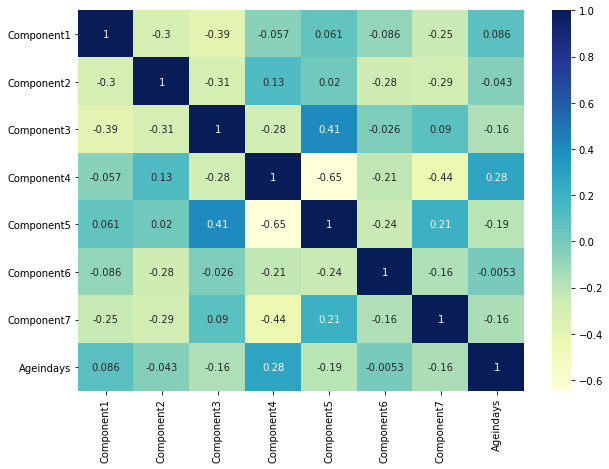

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))

ht = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

### component5 & component3 ,Ageindays & component1 show positive correlation.

### Checking p-values of independent variables (X) by adding constant to take care of 'bo' 


In [20]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       ConcreteStrength   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     189.8
Date:                Fri, 30 Apr 2021   Prob (F-statistic):          2.58e-194
Time:                        09:40:14   Log-Likelihood:                -3764.5
No. Observations:                1005   AIC:                             7547.
Df Residuals:                     996   BIC:                             7591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.7481     26.419     -0.672      0.5

### Backward Feature Elimination : Eliminating variables whose p-value > 0.05
To Eliminate Multicollineiarty among Independent variables.

In [21]:
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:       ConcreteStrength   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              1665.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                        0.00
Time:                        09:40:21   Log-Likelihood:                         -3764.7
No. Observations:                1005   AIC:                                      7545.
Df Residuals:                     997   BIC:                                      7585.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### MODELLING : Splitting the Data into Train and Test

In [22]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=1,test_size=0.2)

### Fitting the Train data into Linear Regression Model to Train the MODEL

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)# fitting the train dataset into the Linear Regression model.
# X_train holds 80% of independent variables, y-train holds 80% of dependent variable.

LinearRegression()

### Checking the Model score for Test Data

In [24]:
model.score(X_test,y_test) # checking the score of the model for test dataset.
# X_test holds 20% of independent variables ,y_test holds 20% of dependent variable.

0.6746489257739383

### Predicting 'y' using X-test data in the Trained Model

In [25]:
y_pred = model.predict(X_test) # Predicting the y_test variable for X-test using the trained model.

### Linear Regression Performance Measures : R^2 , MSE  & RMSE

In [26]:

from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) #R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test,y_pred)))#RMSE

0.6746489257739383
84.43418122216808
9.188807388457333


In [27]:
#dimensions of data
n = len(X_test)
n

201

In [28]:
k = len(X_test.iloc[0])
k

8

In [29]:

# checking R2 score y-test and y-predict
R2 = r2_score(y_test,y_pred)
R2

0.6746489257739383

### Calculating Adjusted R^2

In [30]:
#Adj R^2 is useful in multiple Linear regression 
#as it accounts for number of variables in the scoring
 
Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

0.6610926310145191


### K- fold Cross Validaation ( here I am using cv= 5 , five folds)

In [31]:
#k-fold cross validation using linear regression model

from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(),X,y,cv=5).mean()

0.5897584259568627

In [32]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [33]:
model.intercept_

-17.74808449080917

In [34]:
model.coef_

array([ 0.11722086,  0.09944526,  0.0856315 , -0.15262956,  0.28337992,
        0.01562091,  0.01829086,  0.11218111])